In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [15]:
df = pd.read_csv('experience_salary_data.csv') 
df_binary = df[['YearsExperience', 'Salary']] 

# Taking only the selected two attributes from the dataset 
df_binary.columns = ['Exp', 'Sal'] 
#display the first 5 rows 
df_binary.head()


,Exp,Sal
0,0.5,35000
1,1.0,39000
2,1.3,41000
3,1.5,42000
4,2.0,45000


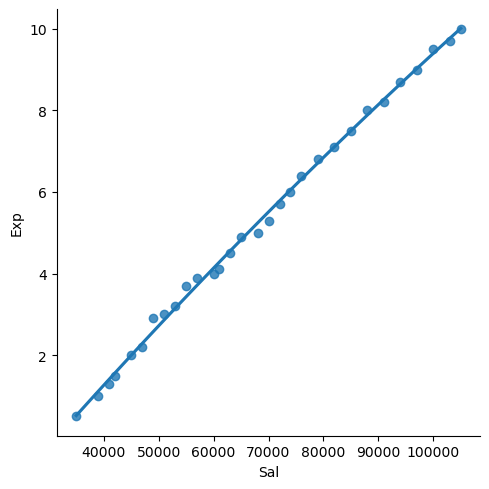

In [16]:
#plotting the Scatter plot to check relationship between Sal and Temp 
sns.lmplot(x ="Sal", y ="Exp", data = df_binary, order = 2, ci = None) 
plt.show()

In [17]:
# Eliminating NaN or missing input numbers 
#df_binary.fillna(method ='ffill', inplace = True)
df_binary.ffill(inplace = True)

In [18]:
X = np.array(df_binary['Sal']).reshape(-1, 1) 
y = np.array(df_binary['Exp']).reshape(-1, 1) 

# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 

# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# Splitting the data into training and testing data 
regr = LinearRegression() 

regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.9961584191793171


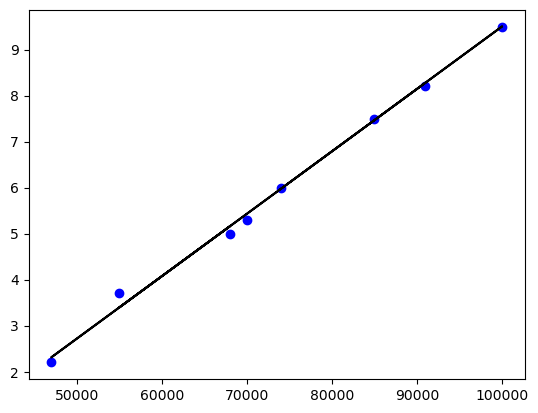

In [19]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 

plt.show() 
# Data scatter of predicted values 


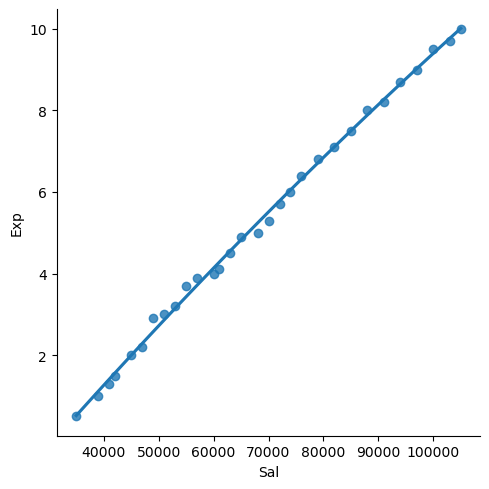

In [20]:
df_binary500 = df_binary[:][:500] 
	
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="Sal", y ="Exp", data = df_binary500, 
							order = 2, ci = None)


In [21]:
df_binary500.ffill(inplace = True) 

X = np.array(df_binary500['Sal']).reshape(-1, 1) 
y = np.array(df_binary500['Exp']).reshape(-1, 1) 

df_binary500.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))


0.9971077399039922


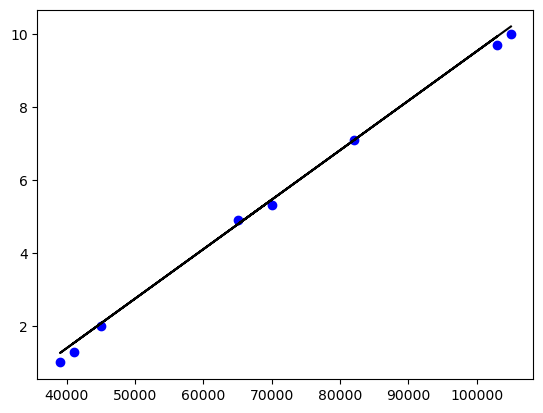

In [22]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 

plt.show() 


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 

print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)


MAE: 0.16115225396556251
MSE: 0.032566396765408456
RMSE: 0.18046162130882137
